# 6 Cross-Validation Techniques You Need To Create Models That People Trust
## TODO
![](images/pexels.jpg)
<figcaption style="text-align: center;">
    <strong>
        Photo by 
        <a href='https://www.pexels.com/@zen-chung?utm_content=attributionCopyText&utm_medium=referral&utm_source=pexels'>Zen Chung</a>
        on 
        <a href='https://www.pexels.com/photo/crop-man-playing-with-dog-on-street-5749795/?utm_content=attributionCopyText&utm_medium=referral&utm_source=pexels'>Pexels.</a> All images are by the author unless specified otherwise.
    </strong>
</figcaption>

# Setup

In [4]:
import logging
import time
import warnings

import catboost as cb
import datatable as dt
import joblib
import lightgbm as lgbm
import matplotlib.pyplot as plt
import numpy as np
import optuna
import pandas as pd
import seaborn as sns
import shap
import umap
import umap.plot
import xgboost as xgb
from optuna.samplers import TPESampler
from sklearn.compose import *
from sklearn.datasets import *
from sklearn.impute import *
from sklearn.metrics import *
from sklearn.model_selection import *
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import *

logging.basicConfig(
    format="%(asctime)s - %(message)s", datefmt="%d-%b-%y %H:%M:%S", level=logging.INFO
)
optuna.logging.set_verbosity(optuna.logging.WARNING)
warnings.filterwarnings("ignore")
pd.set_option("float_format", "{:.5f}".format)

In [62]:
X, y = make_regression(n_samples=100)

In [63]:
def visualize_cv(cv, X, y):
    fig, ax = plt.subplots(figsize=(10, 5))

    for ii, (tr, tt) in enumerate(cv.split(X, y)):
        p1 = ax.scatter(tr, [ii] * len(tr), c="#221f1f", marker="_", lw=8)
        p2 = ax.scatter(tt, [ii] * len(tt), c="#b20710", marker="_", lw=8)
        ax.set(
            title=cv.__class__.__name__,
            xlabel="Data Index",
            ylabel="CV Iteration",
            ylim=[cv.n_splits, -1],
        )
        ax.legend([p1, p2], ["Training", "Validation"])

    plt.show()

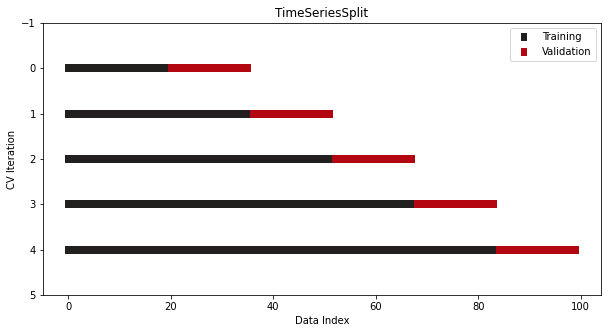

In [73]:
visualize_cv(TimeSeriesSplit(n_splits=5), X, y)

# Introduction

I'll be honest. These days I rarely cross-validate. Maybe it is because of the sheer size of the datasets I've been dealing with. Call me lazy, stupid or even pretentious *blank* for writing an article on something I am not even using. No matter what, one thing is for certain - I won't stop preaching the importance of cross-validation until I am blue in the face. 

What?! Are you confused? That's great - let's get started!

# Why cross-validate?

Until I start selling the related merchandise, I gotta advertise the main idea. Here it goes.

Let's imagine a world where you don't know what a CV procedure is. In that crazy world, you obviously split your available data into a single train and test sets. The model learns from the training data and you test its performance by predicting on the so-called unseen data that is your test set. If you are not satisfied with the score, you tune the heck out of your model using the same sets until [GridSearch](https://towardsdatascience.com/11-times-faster-hyperparameter-tuning-with-halvinggridsearch-232ed0160155) (or [Optuna](https://towardsdatascience.com/why-is-everyone-at-kaggle-obsessed-with-optuna-for-hyperparameter-tuning-7608fdca337c)) cries out "enough!". 

Here are two of the many ways this process can go *horribly* wrong:
1. The splitted sets you created don't represent the whole population well. As an extreme example, out of rows with three categories (a, b, c), all a and b categories may end up in the training set while all *c*s are hanging out in the test set. Or a numeric variable is splitted in a way that values to the left and right of some threshold is not distributed well among the train and sets. Or a situation close to that where the new distributions of the variables in both sets are so different than the originals that the model learns from incorrect information.

2. You leak some knowledge about the test set into the model during hyperparameter tuning. The searching framework keeps track of whether each hyperparameter set yields a high score on the test set. After the search is done, the framework spits out the parameters that work best for that *specific* test set. Since I am using the word *specific*, you should already start thinking about overfitting. Because that's what happens if you keep testing on the same set over and over again - the searching framework just learns what parameters work and don't work and gives you the result that makes you happy for that specific test set.

So, if we get back to the world where CV is loved and extensively used by engineers all over the world, all these problems are solved. Here is the magic of CV, as shown in Sklearn user guide:

![](images/1.png)

The above is an example of 5-fold cross-validation process, which takes 5 iterations to finish. In each iteration, a new model is trained on 4 folds and tested on the last hold-out fold. This way, a model is trained and tested on all of the data without wasting any. 

Next, the averaged scores are reported with their standard deviations as a confidence interval. Only then can you truly judge the performance of your model because the averaged score you got will represent the true potential of the model to effectively learn from the data and predict accurately on unseen samples. 

# 1. KFold

Now, let's

# 2. LeavePOut

# 3. ShuffleSPlit

# 4. StratifiedKFold

# 5. StratifiedShuffleSplit

# 6. TimeSeriesSplit

# Other CVs for non-IID data

# Summary